## Análisis Preliminar de Datos

A continuación se analizan los datos, previo a etapas que involucran técnicas de predicción.

Primeramente se importan las librerias necesarias:

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None) # para ver todas las columnas

Luego se lee el archivo **.csv** con los datos enteros:

In [2]:
stars = pd.read_csv("stellar.csv")

Se muestran los primeros 5 valores:

In [3]:
stars.head()

,Seq,SIMBAD_ID,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,cutoff,clase,type,pla,catalog,e_M,e_R,e_Teff,e_L,mode
0,1,47_Tuc-V69 A,0.876,0.005,0.005,1.316,0.005,0.005,5945,150,150,1.941,0.217,0.217,-0.71,0.10,0.10,4.143,0.003,0.003,NaN,NaN,NaN,3.897169,MS,G,NaN,eker14,0.570776,0.379939,2.523129,11.179804,EB
1,2,47_Tuc-V69 B,0.859,0.006,0.006,1.163,0.006,0.006,5959,150,150,1.531,0.171,0.171,-0.71,0.10,0.10,4.242,0.003,0.003,NaN,NaN,NaN,3.887992,MS,G,NaN,eker14,0.698487,0.515907,2.517201,11.169170,EB
2,3,AD_Boo A,1.414,0.009,0.009,1.614,0.014,0.014,6575,120,120,4.375,0.356,0.356,0.10,0.15,0.15,4.173,0.008,0.008,NaN,NaN,NaN,3.484204,MS,F,NaN,eker14,0.636492,0.867410,1.825095,8.137143,EB
3,4,AD_Boo B,1.209,0.006,0.006,1.218,0.010,0.010,6145,120,120,1.901,0.164,0.164,0.10,0.15,0.15,4.351,0.007,0.007,NaN,NaN,NaN,3.766069,MS,F,NaN,eker14,0.496278,0.821018,1.952807,8.627038,EB
4,5,AG_Ari A,2.164,0.070,0.070,2.232,0.023,0.023,10300,250,250,50.350,5.497,5.497,NaN,NaN,NaN,4.075,0.023,0.023,NaN,NaN,NaN,1.042466,MS,B,NaN,eker14,3.234750,1.030466,2.427184,10.917577,EB


In [4]:
print(len(stars))

934


Se hace drop de los datos que no corresponden a estrellas de la secuencia principal

In [5]:
col = 'clase'
print(stars[col].unique())

['MS' 'PMS']


Como se puede observar existen dos tipos, por lo que se van a eliminar los datos pertenecientes a **PMS**

In [6]:
stars = stars[stars.clase != 'PMS']

In [7]:
print(len(stars))

726


Se escogen los valores de las columnas relevantes y se ajusta el dataframe (estructura de dato usada en *PANDAS*):

In [8]:
cols = ['M','eM1','eM2','R','eR1','eR2','Teff','eTeff1', 'eTeff2','L','eL1','eL2','Meta','eMeta1', 'eMeta2', 'logg', 'elogg1', 'elogg2', 'rho', 'erho1', 'erho2','clase']

In [9]:
stars = stars[cols]

In [10]:
stars.head(10)

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,clase
0,0.876,0.005,0.005,1.316,0.005,0.005,5945,150,150,1.941,0.217,0.217,-0.71,0.10,0.10,4.143,0.003,0.003,NaN,NaN,NaN,MS
1,0.859,0.006,0.006,1.163,0.006,0.006,5959,150,150,1.531,0.171,0.171,-0.71,0.10,0.10,4.242,0.003,0.003,NaN,NaN,NaN,MS
2,1.414,0.009,0.009,1.614,0.014,0.014,6575,120,120,4.375,0.356,0.356,0.10,0.15,0.15,4.173,0.008,0.008,NaN,NaN,NaN,MS
3,1.209,0.006,0.006,1.218,0.010,0.010,6145,120,120,1.901,0.164,0.164,0.10,0.15,0.15,4.351,0.007,0.007,NaN,NaN,NaN,MS
4,2.164,0.070,0.070,2.232,0.023,0.023,10300,250,250,50.350,5.497,5.497,NaN,NaN,NaN,4.075,0.023,0.023,NaN,NaN,NaN,MS
5,2.148,0.070,0.070,2.074,0.022,0.022,9800,230,230,35.645,3.801,3.801,NaN,NaN,NaN,4.137,0.023,0.023,NaN,NaN,NaN,MS
6,1.974,0.040,0.040,2.764,0.020,0.020,7100,60,60,17.418,0.654,0.654,NaN,NaN,NaN,3.850,0.004,0.004,NaN,NaN,NaN,MS
7,2.140,0.040,0.040,3.912,0.030,0.030,6700,60,60,27.669,1.105,1.105,NaN,NaN,NaN,3.580,0.004,0.004,NaN,NaN,NaN,MS
9,1.190,0.006,0.006,1.762,0.007,0.007,6310,147,147,4.365,0.421,0.421,-0.14,0.10,0.10,NaN,NaN,NaN,NaN,NaN,NaN,MS
10,1.105,0.007,0.007,1.224,0.003,0.003,5824,26,26,1.549,0.029,0.029,0.24,0.04,0.04,4.306,0.004,0.004,NaN,NaN,NaN,MS


In [11]:
stars.shape

(726, 22)

Se cuentan los valores NaN, se indica en que columna se encuentran, finalmente se genera una curva para vizualización:

In [12]:
nulls = stars.isnull().sum(axis = 0)

In [13]:
nulls

M           0
eM1         0
eM2         0
R           0
eR1         0
eR2         0
Teff        0
eTeff1      0
eTeff2      0
L           7
eL1         7
eL2         7
Meta      197
eMeta1    197
eMeta2    197
logg       68
elogg1     68
elogg2     68
rho       274
erho1     274
erho2     274
clase       0
dtype: int64

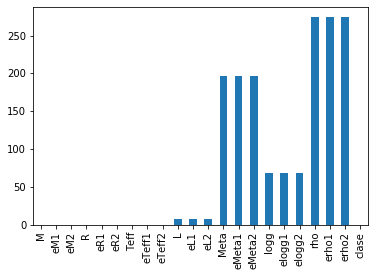

In [14]:
nulls.plot(kind='bar')

In [15]:
print('El porcentaje de NaNs en L es:', round(17*100/726,2), '%')
print('El porcentaje de NaNs en Meta es:', round(216*100/726,2), '%')
print('El porcentaje de NaNs en logg es:', round(94*100/726,2), '%')
print('El porcentaje de NaNs en rho es:', round(304*100/726,2), '%')

El porcentaje de NaNs en L es: 2.34 %
El porcentaje de NaNs en Meta es: 29.75 %
El porcentaje de NaNs en logg es: 12.95 %
El porcentaje de NaNs en rho es: 41.87 %


In [16]:
# se promedian los errores en una sola columna


In [17]:
# se deben contar las que son class == MS 



In [18]:
# crear un dataframe con los datos que correspondes solo a la class == MS



Debemos hacer varias bases de datos, debido a que tenemos que asumir criterios para el manejo de los valores faltantes, sugiero 3 datasets, solo usando los class==MS:

- El primero (DS1) seria con solo los datos que no tengan valores faltantes, esto es hacer drop de cualquier dato que tenga en alguna de sus features un NaN. 
- El segundo (DS2) seria mantener los que tengan valores faltantes, y reemplazar los NaN con la media del feature correspondiente.
- El tercero (DS3), seria igual que el segundo, pero excluyendo el feature "rho".

Se procede a generar un set de datos en donde se eliminan todas las filas donde exista un valor NaN en alguna fila

In [19]:
stars_drop_DS1 = stars.dropna()

In [20]:
stars_drop_DS1.head(10)

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,clase
290,1.15,0.04,0.04,1.73,0.04,0.04,5718,71,71,2.700,0.342212,0.342212,0.21,0.08,0.08,4.018,0.013,0.013,0.220865,0.010653,0.010653,MS
291,1.30,0.05,0.05,2.08,0.05,0.05,6251,78,78,6.664,0.597819,0.597819,-0.02,0.08,0.08,3.916,0.013,0.013,0.144876,0.007102,0.007102,MS
292,1.29,0.08,0.08,1.74,0.05,0.05,6420,71,71,4.555,0.353974,0.353974,-0.07,0.11,0.11,4.063,0.016,0.016,0.243591,0.012073,0.012073,MS
293,1.14,0.05,0.05,1.88,0.03,0.03,5926,78,78,4.119,0.374560,0.374560,-0.02,0.11,0.11,3.945,0.014,0.014,0.170442,0.008522,0.008522,MS
294,1.18,0.07,0.07,1.50,0.04,0.04,6316,78,78,3.422,0.297267,0.297267,-0.07,0.08,0.08,4.157,0.015,0.015,0.350117,0.017044,0.017044,MS
295,1.08,0.05,0.05,1.41,0.02,0.02,5705,78,78,2.374,0.207374,0.207374,0.38,0.08,0.08,4.172,0.013,0.013,0.385626,0.017044,0.017044,MS
296,1.17,0.04,0.04,1.37,0.03,0.03,6199,65,65,3.635,0.304111,0.304111,-0.13,0.08,0.08,4.228,0.014,0.014,0.450252,0.021305,0.021305,MS
297,1.22,0.05,0.05,1.83,0.04,0.04,6381,71,71,6.112,0.478281,0.478281,-0.13,0.11,0.11,4.000,0.014,0.014,0.199560,0.008522,0.008522,MS
298,1.44,0.05,0.05,2.45,0.05,0.05,6225,71,71,6.714,0.596777,0.596777,0.10,0.08,0.08,3.817,0.012,0.012,0.097294,0.004261,0.004261,MS
300,1.15,0.04,0.04,1.79,0.04,0.04,6082,65,65,4.372,0.372936,0.372936,-0.24,0.08,0.08,3.990,0.012,0.012,0.199560,0.007812,0.007812,MS


Se procede a generar un set de datos en donde se rellena algún valor NaN por su respectivo valor promedio de la columna.

In [21]:
stars_mean_DS2 = stars.fillna(stars.mean())

In [22]:
stars_mean_DS2.head(10)

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,clase
0,0.876,0.005,0.005,1.316,0.005,0.005,5945,150,150,1.941,0.217,0.217,-0.710000,0.100000,0.100000,4.143000,0.003000,0.003000,0.333666,0.012634,0.012152,MS
1,0.859,0.006,0.006,1.163,0.006,0.006,5959,150,150,1.531,0.171,0.171,-0.710000,0.100000,0.100000,4.242000,0.003000,0.003000,0.333666,0.012634,0.012152,MS
2,1.414,0.009,0.009,1.614,0.014,0.014,6575,120,120,4.375,0.356,0.356,0.100000,0.150000,0.150000,4.173000,0.008000,0.008000,0.333666,0.012634,0.012152,MS
3,1.209,0.006,0.006,1.218,0.010,0.010,6145,120,120,1.901,0.164,0.164,0.100000,0.150000,0.150000,4.351000,0.007000,0.007000,0.333666,0.012634,0.012152,MS
4,2.164,0.070,0.070,2.232,0.023,0.023,10300,250,250,50.350,5.497,5.497,-0.049187,0.103461,0.100625,4.075000,0.023000,0.023000,0.333666,0.012634,0.012152,MS
5,2.148,0.070,0.070,2.074,0.022,0.022,9800,230,230,35.645,3.801,3.801,-0.049187,0.103461,0.100625,4.137000,0.023000,0.023000,0.333666,0.012634,0.012152,MS
6,1.974,0.040,0.040,2.764,0.020,0.020,7100,60,60,17.418,0.654,0.654,-0.049187,0.103461,0.100625,3.850000,0.004000,0.004000,0.333666,0.012634,0.012152,MS
7,2.140,0.040,0.040,3.912,0.030,0.030,6700,60,60,27.669,1.105,1.105,-0.049187,0.103461,0.100625,3.580000,0.004000,0.004000,0.333666,0.012634,0.012152,MS
9,1.190,0.006,0.006,1.762,0.007,0.007,6310,147,147,4.365,0.421,0.421,-0.140000,0.100000,0.100000,4.116943,0.015766,0.015952,0.333666,0.012634,0.012152,MS
10,1.105,0.007,0.007,1.224,0.003,0.003,5824,26,26,1.549,0.029,0.029,0.240000,0.040000,0.040000,4.306000,0.004000,0.004000,0.333666,0.012634,0.012152,MS


Como se puede observar a continuación las longitudes de cada set de datos cambió.

In [23]:
len_DS1 = len(stars_drop_DS1)
print(len_DS1)


423


In [24]:
len_DS2 = len(stars_mean_DS2)
print(len_DS2)

726


A continuación se procede a generar una única columna de error para cada variable en el set de datos.

## Tratamiento del set de datos DS1

In [25]:
#error M eM_avg
column_list = ['eM1','eM2']
stars_drop_DS1["eM_avg"] = stars_drop_DS1[column_list].sum(axis=1)

#error R eR_avg
column_list = ['eR1','eR2']
stars_drop_DS1["eR_avg"] = stars_drop_DS1[column_list].sum(axis=1)

#error Teff eTeff_avg
column_list = ['eTeff1','eTeff2']
stars_drop_DS1["eTeff_avg"] = stars_drop_DS1[column_list].sum(axis=1)

#error L el_avg
column_list = ['eL1','eL2']
stars_drop_DS1["eL_avg"] = stars_drop_DS1[column_list].sum(axis=1)

#error Meta eMeta_avg
column_list = ['eMeta1','eMeta2']
stars_drop_DS1["eMeta_avg"] = stars_drop_DS1[column_list].sum(axis=1)

#error logg elogg_avg
column_list = ['elogg1','elogg2']
stars_drop_DS1["elogg_avg"] = stars_drop_DS1[column_list].sum(axis=1)

#error rho eR_avg
column_list = ['erho1','erho2']
stars_drop_DS1["erho_avg"] = stars_drop_DS1[column_list].sum(axis=1)

#Promediado del error
stars_drop_DS1['eM_avg'] = stars_drop_DS1['eM_avg'] / 2
stars_drop_DS1['eR_avg'] = stars_drop_DS1['eR_avg'] / 2
stars_drop_DS1['eTeff_avg'] = stars_drop_DS1['eTeff_avg'] / 2
stars_drop_DS1['eL_avg'] = stars_drop_DS1['eL_avg'] / 2
stars_drop_DS1['eMeta_avg'] = stars_drop_DS1['eMeta_avg'] / 2
stars_drop_DS1['elogg_avg'] = stars_drop_DS1['elogg_avg'] / 2
stars_drop_DS1['erho_avg'] = stars_drop_DS1['erho_avg'] / 2

#Se muestra la nueva tabla con los errores promediados por fila
stars_drop_DS1.head()

C:\Users\vernyjmo\Miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vernyjmo\Miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\vernyjmo\Miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,clase,eM_avg,eR_avg,eTeff_avg,eL_avg,eMeta_avg,elogg_avg,erho_avg
290,1.15,0.04,0.04,1.73,0.04,0.04,5718,71,71,2.700,0.342212,0.342212,0.21,0.08,0.08,4.018,0.013,0.013,0.220865,0.010653,0.010653,MS,0.04,0.04,71.0,0.342212,0.08,0.013,0.010653
291,1.30,0.05,0.05,2.08,0.05,0.05,6251,78,78,6.664,0.597819,0.597819,-0.02,0.08,0.08,3.916,0.013,0.013,0.144876,0.007102,0.007102,MS,0.05,0.05,78.0,0.597819,0.08,0.013,0.007102
292,1.29,0.08,0.08,1.74,0.05,0.05,6420,71,71,4.555,0.353974,0.353974,-0.07,0.11,0.11,4.063,0.016,0.016,0.243591,0.012073,0.012073,MS,0.08,0.05,71.0,0.353974,0.11,0.016,0.012073
293,1.14,0.05,0.05,1.88,0.03,0.03,5926,78,78,4.119,0.374560,0.374560,-0.02,0.11,0.11,3.945,0.014,0.014,0.170442,0.008522,0.008522,MS,0.05,0.03,78.0,0.374560,0.11,0.014,0.008522
294,1.18,0.07,0.07,1.50,0.04,0.04,6316,78,78,3.422,0.297267,0.297267,-0.07,0.08,0.08,4.157,0.015,0.015,0.350117,0.017044,0.017044,MS,0.07,0.04,78.0,0.297267,0.08,0.015,0.017044


## Tratamiento del set de datos DS2

In [26]:
#error M eM_avg
column_list = ['eM1','eM2']
stars_mean_DS2["eM_avg"] = stars_mean_DS2[column_list].sum(axis=1)

#error R eR_avg
column_list = ['eR1','eR2']
stars_mean_DS2["eR_avg"] = stars_mean_DS2[column_list].sum(axis=1)

#error Teff eTeff_avg
column_list = ['eTeff1','eTeff2']
stars_mean_DS2["eTeff_avg"] = stars_mean_DS2[column_list].sum(axis=1)

#error L el_avg
column_list = ['eL1','eL2']
stars_mean_DS2["eL_avg"] = stars_mean_DS2[column_list].sum(axis=1)

#error Meta eMeta_avg
column_list = ['eMeta1','eMeta2']
stars_mean_DS2["eMeta_avg"] = stars_mean_DS2[column_list].sum(axis=1)

#error logg elogg_avg
column_list = ['elogg1','elogg2']
stars_mean_DS2["elogg_avg"] = stars_mean_DS2[column_list].sum(axis=1)

#error rho eR_avg
column_list = ['erho1','erho2']
stars_mean_DS2["erho_avg"] = stars_mean_DS2[column_list].sum(axis=1)

#Promediado del error
stars_mean_DS2['eM_avg'] = stars_mean_DS2['eM_avg'] / 2
stars_mean_DS2['eR_avg'] = stars_mean_DS2['eR_avg'] / 2
stars_mean_DS2['eTeff_avg'] = stars_mean_DS2['eTeff_avg'] / 2
stars_mean_DS2['eL_avg'] = stars_mean_DS2['eL_avg'] / 2
stars_mean_DS2['eMeta_avg'] = stars_mean_DS2['eMeta_avg'] / 2
stars_mean_DS2['elogg_avg'] = stars_mean_DS2['elogg_avg'] / 2
stars_mean_DS2['erho_avg'] = stars_mean_DS2['erho_avg'] / 2

#Se muestra la nueva tabla con los errores promediados por fila
stars_mean_DS2.head()

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,clase,eM_avg,eR_avg,eTeff_avg,eL_avg,eMeta_avg,elogg_avg,erho_avg
0,0.876,0.005,0.005,1.316,0.005,0.005,5945,150,150,1.941,0.217,0.217,-0.710000,0.100000,0.100000,4.143,0.003,0.003,0.333666,0.012634,0.012152,MS,0.005,0.005,150.0,0.217,0.100000,0.003,0.012393
1,0.859,0.006,0.006,1.163,0.006,0.006,5959,150,150,1.531,0.171,0.171,-0.710000,0.100000,0.100000,4.242,0.003,0.003,0.333666,0.012634,0.012152,MS,0.006,0.006,150.0,0.171,0.100000,0.003,0.012393
2,1.414,0.009,0.009,1.614,0.014,0.014,6575,120,120,4.375,0.356,0.356,0.100000,0.150000,0.150000,4.173,0.008,0.008,0.333666,0.012634,0.012152,MS,0.009,0.014,120.0,0.356,0.150000,0.008,0.012393
3,1.209,0.006,0.006,1.218,0.010,0.010,6145,120,120,1.901,0.164,0.164,0.100000,0.150000,0.150000,4.351,0.007,0.007,0.333666,0.012634,0.012152,MS,0.006,0.010,120.0,0.164,0.150000,0.007,0.012393
4,2.164,0.070,0.070,2.232,0.023,0.023,10300,250,250,50.350,5.497,5.497,-0.049187,0.103461,0.100625,4.075,0.023,0.023,0.333666,0.012634,0.012152,MS,0.070,0.023,250.0,5.497,0.102043,0.023,0.012393


# Anáñisis y procesado de los datos

## Relación de Variables M y R versus las demás 

### Set de datos DS1 como base

In [27]:
df_DS1 = stars_drop_DS1.drop(['eM1', 'eM2', 'eR1', 'eR2', 'eTeff1', 'eTeff2', 'eL1','eL2', 'eMeta1', 'eMeta2', 'elogg1', 'elogg2', 'erho1', 
                                'erho2', 'eM_avg', 'eR_avg', 'eTeff_avg', 'eL_avg','eMeta_avg', 'elogg_avg', 'erho_avg'], axis='columns')

df_DS1.head()

,M,R,Teff,L,Meta,logg,rho,clase
290,1.15,1.73,5718,2.700,0.21,4.018,0.220865,MS
291,1.30,2.08,6251,6.664,-0.02,3.916,0.144876,MS
292,1.29,1.74,6420,4.555,-0.07,4.063,0.243591,MS
293,1.14,1.88,5926,4.119,-0.02,3.945,0.170442,MS
294,1.18,1.50,6316,3.422,-0.07,4.157,0.350117,MS


<Figure size 800x640 with 0 Axes>

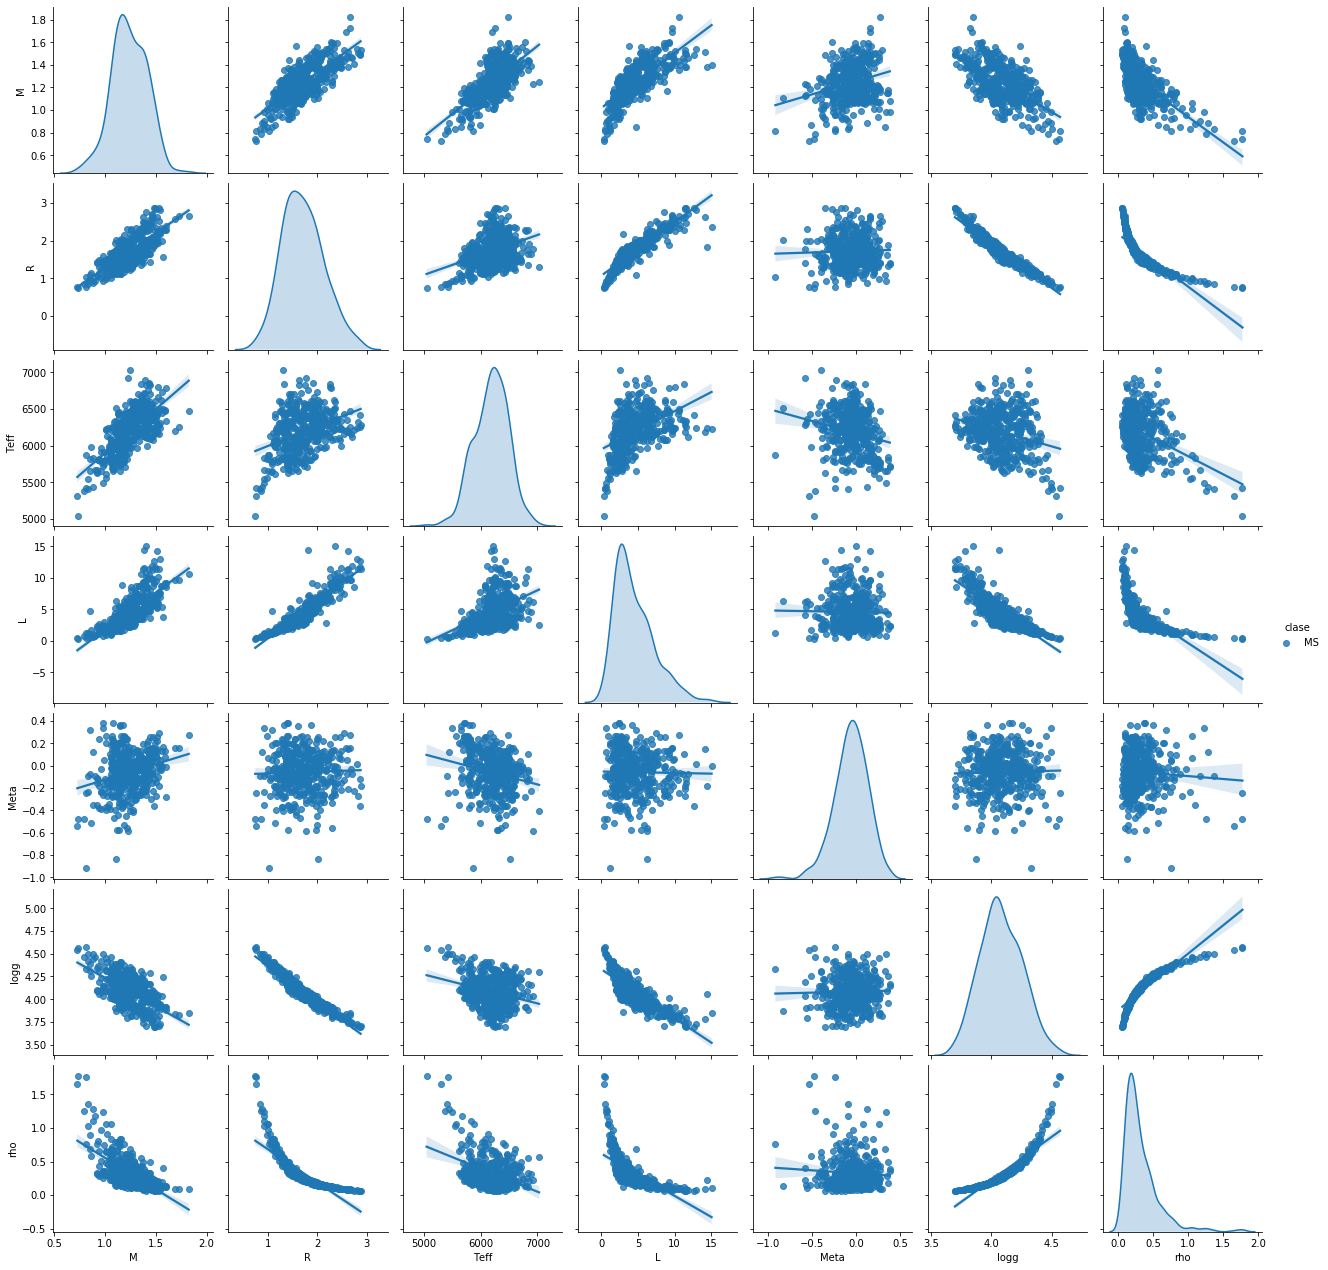

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df_DS1, kind="reg", hue="clase")
#sns.pairplot(df_DS1, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

### Set de datos DS2 como base

In [29]:
df_DS2 = stars_mean_DS2.drop(['eM1', 'eM2', 'eR1', 'eR2', 'eTeff1', 'eTeff2', 'eL1','eL2', 'eMeta1', 'eMeta2', 'elogg1', 'elogg2', 'erho1', 
                                'erho2', 'eM_avg', 'eR_avg', 'eTeff_avg', 'eL_avg','eMeta_avg', 'elogg_avg', 'erho_avg'], axis='columns')

df_DS2.head()

,M,R,Teff,L,Meta,logg,rho,clase
0,0.876,1.316,5945,1.941,-0.710000,4.143,0.333666,MS
1,0.859,1.163,5959,1.531,-0.710000,4.242,0.333666,MS
2,1.414,1.614,6575,4.375,0.100000,4.173,0.333666,MS
3,1.209,1.218,6145,1.901,0.100000,4.351,0.333666,MS
4,2.164,2.232,10300,50.350,-0.049187,4.075,0.333666,MS


<Figure size 800x640 with 0 Axes>

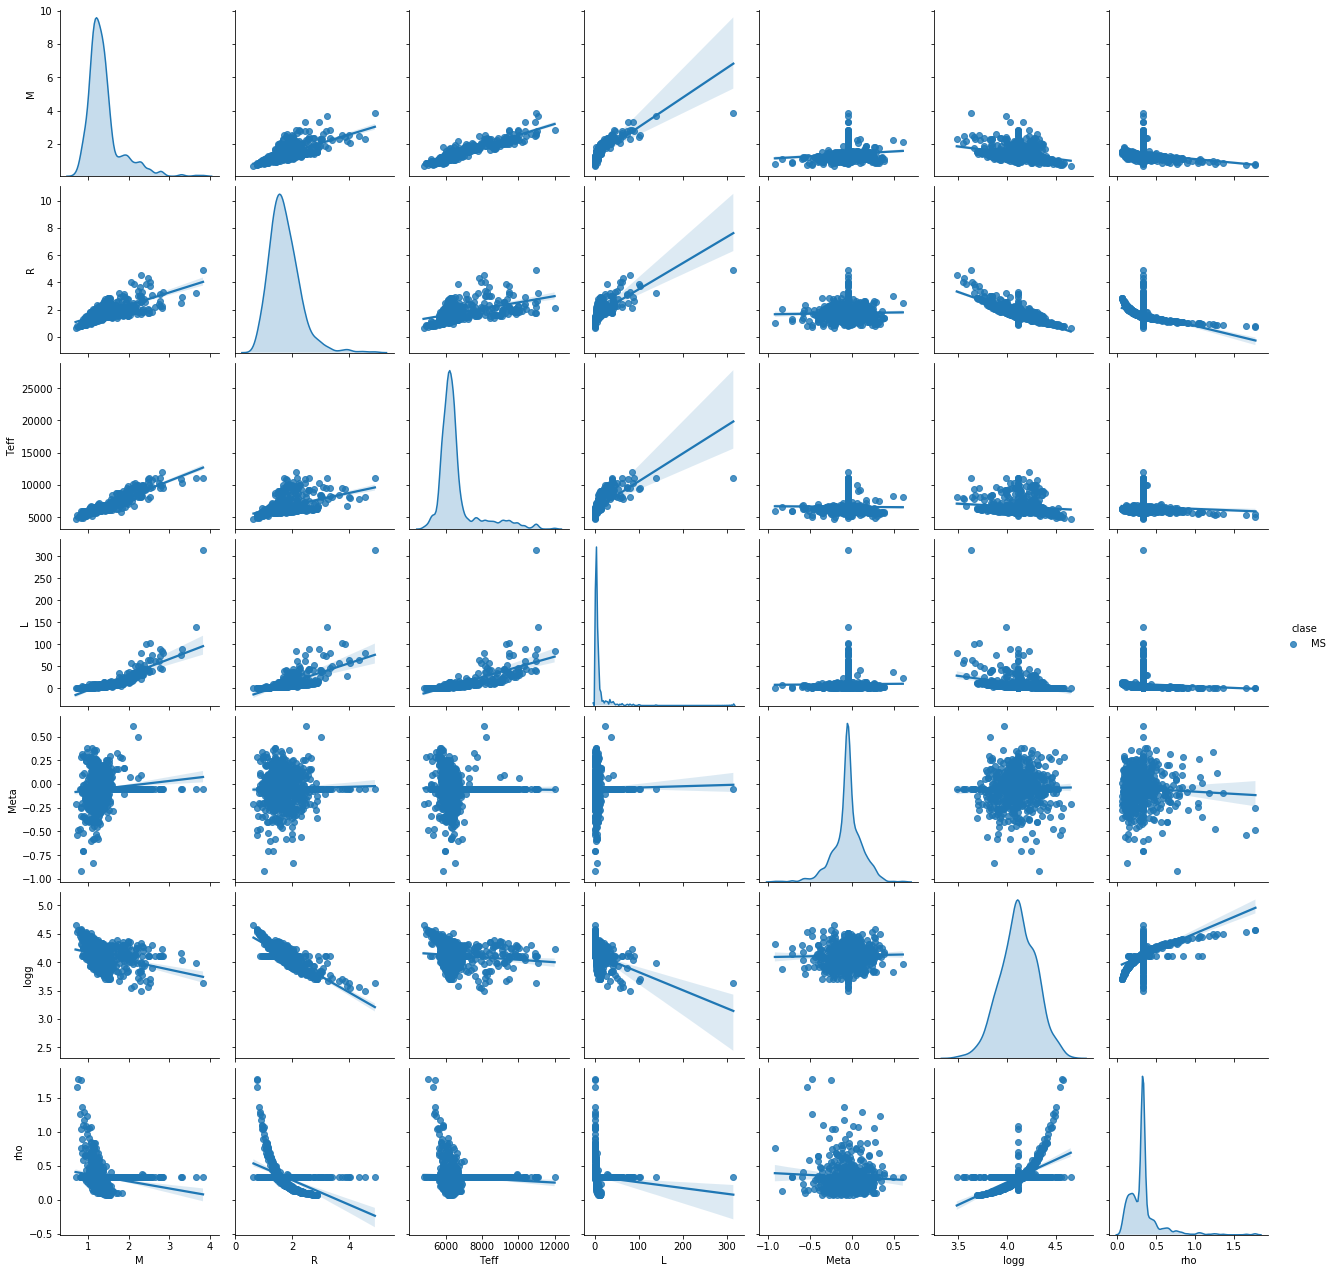

In [30]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df_DS2, kind="reg", hue="clase")
#sns.pairplot(df_DS1, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

### Set de datos DS3 como base (no rho)

In [31]:
stars_drop_DS3 = stars_drop_DS1.drop(['rho', 'erho1', 'erho2', 'erho_avg'], axis='columns')
stars_drop_DS3.head()

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,clase,eM_avg,eR_avg,eTeff_avg,eL_avg,eMeta_avg,elogg_avg
290,1.15,0.04,0.04,1.73,0.04,0.04,5718,71,71,2.700,0.342212,0.342212,0.21,0.08,0.08,4.018,0.013,0.013,MS,0.04,0.04,71.0,0.342212,0.08,0.013
291,1.30,0.05,0.05,2.08,0.05,0.05,6251,78,78,6.664,0.597819,0.597819,-0.02,0.08,0.08,3.916,0.013,0.013,MS,0.05,0.05,78.0,0.597819,0.08,0.013
292,1.29,0.08,0.08,1.74,0.05,0.05,6420,71,71,4.555,0.353974,0.353974,-0.07,0.11,0.11,4.063,0.016,0.016,MS,0.08,0.05,71.0,0.353974,0.11,0.016
293,1.14,0.05,0.05,1.88,0.03,0.03,5926,78,78,4.119,0.374560,0.374560,-0.02,0.11,0.11,3.945,0.014,0.014,MS,0.05,0.03,78.0,0.374560,0.11,0.014
294,1.18,0.07,0.07,1.50,0.04,0.04,6316,78,78,3.422,0.297267,0.297267,-0.07,0.08,0.08,4.157,0.015,0.015,MS,0.07,0.04,78.0,0.297267,0.08,0.015


In [32]:
df_DS3 = stars_drop_DS3.drop(['eM1', 'eM2', 'eR1', 'eR2', 'eTeff1', 'eTeff2', 'eL1','eL2', 'eMeta1', 'eMeta2', 'elogg1', 'elogg2', 
                             'eM_avg', 'eR_avg', 'eTeff_avg', 'eL_avg','eMeta_avg', 'elogg_avg'], axis='columns')

df_DS3.head()

,M,R,Teff,L,Meta,logg,clase
290,1.15,1.73,5718,2.700,0.21,4.018,MS
291,1.30,2.08,6251,6.664,-0.02,3.916,MS
292,1.29,1.74,6420,4.555,-0.07,4.063,MS
293,1.14,1.88,5926,4.119,-0.02,3.945,MS
294,1.18,1.50,6316,3.422,-0.07,4.157,MS


<Figure size 800x640 with 0 Axes>

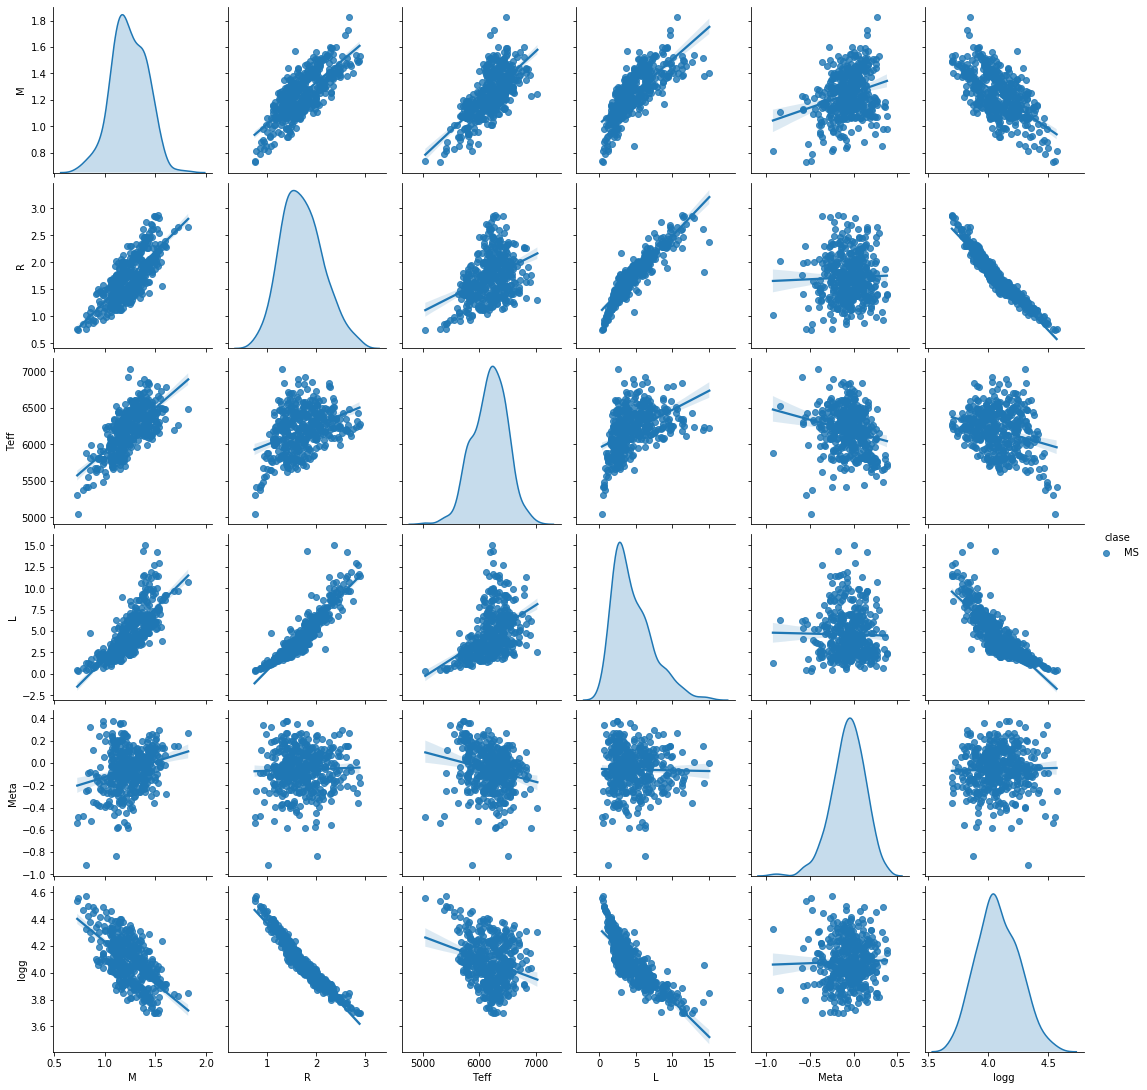

In [33]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df_DS3, kind="reg", hue="clase")
#sns.pairplot(df_DS1, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

# Regresión Lineal

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
#Se genera el modelo de regresion lineal
linear_regression = LinearRegression()

In [36]:
stars_drop_DS1.columns[1:]

Index(['eM1', 'eM2', 'R', 'eR1', 'eR2', 'Teff', 'eTeff1', 'eTeff2', 'L', 'eL1',
       'eL2', 'Meta', 'eMeta1', 'eMeta2', 'logg', 'elogg1', 'elogg2', 'rho',
       'erho1', 'erho2', 'clase', 'eM_avg', 'eR_avg', 'eTeff_avg', 'eL_avg',
       'eMeta_avg', 'elogg_avg', 'erho_avg'],
      dtype='object')

In [37]:
y = stars_mean_DS2['M']
x = stars_mean_DS2[['Teff','L','Meta','logg','rho']]

In [38]:
model = linear_regression.fit(x,y)

In [39]:
y_pred = model.predict(x)

In [42]:
#Se imprime la intercepcion y los coeficientes del modelo
print('Intercepcion: \n', model.intercept_)
print('Coeficientes: \n', model.coef_)

Intercepcion: 
 1.0233272639850146
Coeficientes: 
 [ 2.71501246e-04  4.83143460e-03  3.16568116e-01 -3.50428707e-01
 -6.00095310e-02]


### Ecuación de la Masa para el modelo planteado

M = (Intercepcion) + (Coeficiente_Teff) X1 + (Coeficiente_L) X2 + (Coeficiente_Meta) X3 + (Coeficiente_logg) X4 + (Coeficiente_rho) X5

M = (1.02) + (2.75 x 10-4) X1 + (4.83 x 10-3) X2 + (3.16 x 10-1) X3 + (-3.50 x 10-1) + (-6.00 x 10-2)

In [44]:
#Poniendo a prueba el modelo
New_Teff = 8000
New_L = 15
New_Meta = 0.5
New_logg = 4.5
New_rho = 1

print ('Valor de la masa predecido: \n', model.predict([[New_Teff , New_L, New_Meta, New_logg, New_rho]]))

Valor de la masa predecido: 
 [1.7891541]


In [48]:
#Se procede a importatr statsmodel y utilizar el OLS para compararlo contra el modelo anterior

import statsmodels.api as sm
model_OLS = sm.OLS(y,x).fit()
print(model_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                      M   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.006e+04
Date:                Sun, 11 Oct 2020   Prob (F-statistic):                        0.00
Time:                        22:35:44   Log-Likelihood:                          500.17
No. Observations:                 726   AIC:                                     -990.3
Df Residuals:                     721   BIC:                                     -967.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

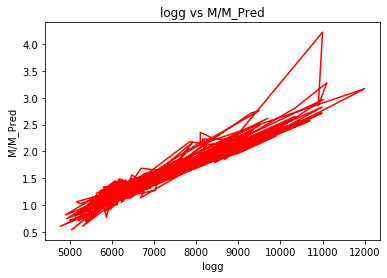

In [52]:
X_logg = stars_mean_DS2[["logg"]].to_numpy()
X_R = stars_mean_DS2[["R"]].to_numpy()
X_Teff = stars_mean_DS2[["Teff"]].to_numpy()

plt.title("logg vs M/M_Pred")
plt.xlabel('logg')
plt.ylabel('M/M_Pred')
plt.plot(X_Teff, y_pred, color='red')
plt.show()

In [74]:
#Se procede a hacer fit de alunos features tomando como salida la Masa 
#Se utiliza el set de datos con el que se completaron los NaN con el promedio de su columna

#Se extraen los valores Xs del set de datos en arreglos que se van a utilizar en el modelo
X_logg = stars_mean_DS2[["logg"]].to_numpy()
X_R = stars_mean_DS2[["R"]].to_numpy()
X_Teff = stars_mean_DS2[["Teff"]].to_numpy()

#Se extraen los valores Ys para ser aproximados porsteriormente
Y_M = stars_mean_DS2[["M"]].to_numpy()

print("El tamaño de la columna Teff es de", len(X_logg), "datos")
print("El tamaño de la columna R es de", len(X_R), "datos")
print("El tamaño de la columna Teff es de", len(X_Teff), "datos")
print("El tamaño de la columna M es de", len(Y_M), "datos")

#Con esto se busca probar que tenemos la misma cantidad de datos para cada columna a analizar

El tamaño de la columna Teff es de 726 datos
El tamaño de la columna R es de 726 datos
El tamaño de la columna Teff es de 726 datos
El tamaño de la columna M es de 726 datos


In [86]:
model_logg = model.fit(X_logg, Y_M)
#Se generan las salidas predecidas de M con respecto a cada X

y_pred_logg = model_logg.predict(X_logg)


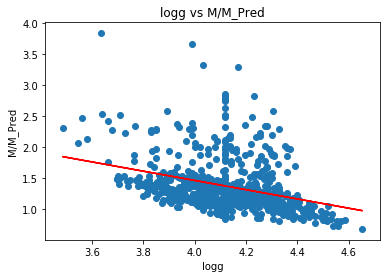

In [87]:
plt.title("logg vs M/M_Pred")
plt.xlabel('logg')
plt.ylabel('M/M_Pred')
plt.scatter(X_logg, Y_M)
plt.plot(X_logg, y_pred_logg, color='red')
plt.show()
        

In [88]:
model_R = model.fit(X_R, Y_M)
y_pred_R = model_R.predict(X_R)

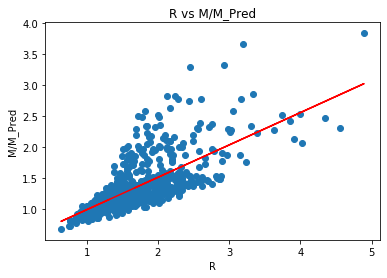

In [89]:
plt.title("R vs M/M_Pred")
plt.xlabel('R')
plt.ylabel('M/M_Pred')
plt.scatter(X_R, Y_M)
plt.plot(X_R, y_pred_R, color='red')
plt.show()

In [90]:
#Se generan los modelos independiente de cada Xs
model_Teff = model.fit(X_Teff, Y_M)
y_pred_Teff = model_Teff.predict(X_Teff)

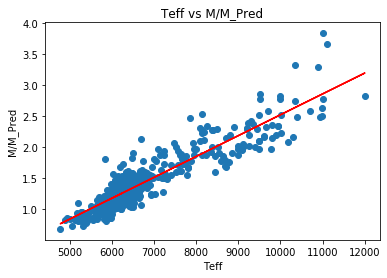

In [92]:
plt.title("Teff vs M/M_Pred")
plt.xlabel('Teff')
plt.ylabel('M/M_Pred')
plt.scatter(X_Teff, Y_M)
plt.plot(X_Teff, y_pred_M, color='red')
plt.show()
        

# Random Forest

In [118]:
#Asignacion de Labels y Features del set de datos para el algoritmo

labels = np.array(stars_mean_DS2['M'])

features = stars_mean_DS2.drop(['M','eM1', 'eM2', 'eR1', 'eR2', 'eTeff1', 'eTeff2', 'L', 'eL1','eL2', 'Meta', 'eMeta1', 'eMeta2', 'elogg1', 'elogg2', 'rho','erho1', 
                                'erho2', 'eM_Avg', 'eR_Avg', 'eTeff_Avg', 'eL_Avg','eMeta_Avg', 'elogg_Avg'], axis='columns')

feature_list = list(features.columns)

features = np.array(features)

print(features)

[[1.31600000e+00 5.94500000e+03 4.14300000e+00]
 [1.16300000e+00 5.95900000e+03 4.24200000e+00]
 [1.61400000e+00 6.57500000e+03 4.17300000e+00]
 ...
 [8.58400000e-01 5.27000000e+03 4.11694299e+00]
 [9.60000000e-01 5.16500000e+03 4.11694299e+00]
 [1.68400000e+00 6.24300000e+03 4.11694299e+00]]


In [119]:
#Se importa la libreria de skicit-learn para realizar el tranining y test de los datos
from sklearn.model_selection import train_test_split

In [120]:
#Se dividen los datos en los de entrenamiento y en los de test

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [121]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (544, 3)
Training Labels Shape: (544,)
Testing Features Shape: (182, 3)
Testing Labels Shape: (182,)


In [123]:
#Se establese una base comparativa para poder probar nuestro modelo
#Se escoge la temperatura para esto

print(feature_list)
baseline_preds = test_features[:, feature_list.index('R')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


['R', 'Teff', 'logg']
Average baseline error:  0.39


In [124]:
#Se importa el modelo de entrenamiento
from sklearn.ensemble import RandomForestRegressor

In [125]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [129]:
# Se utiliza el metodo de RandomForest para predecir la Masa
predictions = rf.predict(test_features)
# Se calcula el error absoluto
errors = abs(predictions - test_labels)
# Se despliega en pantalla el promedio del error absoluto (mae)
print('Promedio del error absoluto:', round(np.mean(errors), 2), 'grados.')

Promedio del error absoluto: 0.07 grados.


In [130]:
# Se calcula el promedio procentual del error absoluto (MAPE)
mape = 100 * (errors / test_labels)
# Se calcula la precision del modelo
accuracy = 100 - np.mean(mape)
print('Precision:', round(accuracy, 2), '%.')

Precision: 95.16 %.


In [133]:
# Se xtrae la importancia de las variables
importances = list(rf.feature_importances_)
# Se enlista las variables junto con la importancia
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Se hace un sort para dejar de mayor a menor las variables mas importantes
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Se imprimen las variables segun su importancia par el modelo
[print('Variable: {:20} Importancia: {}'.format(*pair)) for pair in feature_importances];

Variable: Teff                 Importancia: 0.86
Variable: R                    Importancia: 0.12
Variable: logg                 Importancia: 0.02
